In [1]:
import pandas as pd
total = pd.read_csv("/content/drive/MyDrive/2차프로젝트 공유폴더/프로젝트데이터셋/total_final.csv", index_col=0)

In [9]:
data = total.copy()

In [2]:
data['대분류']=data['대분류'].replace(['가공식품','신선식품'],'식품')
data['대분류']=data['대분류'].replace(['의류','패션잡화'],'패션')
data['대분류']=data['대분류'].replace(['전문스포츠/레저','교육/문화용품'],'취미')
data['대분류']=data['대분류'].replace(['디지털/가전','가구/인테리어'],'주거')

In [3]:
data

,대분류코드,중분류코드,소분류코드,중분류명,소분류명,대분류,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역,년도,분류,분기,제휴사
0,1,101,A010101,일용잡화,위생세제,일상용품,2757986,15148,10,20140920,20,1000,1,5,2.0,2014,저가,3,A
1,1,101,A010101,일용잡화,위생세제,일상용품,1878938,15148,10,20140505,19,15000,1,5,2.0,2014,저가,2,A
2,1,101,A010101,일용잡화,위생세제,일상용품,3436437,15148,10,20150102,16,9900,1,5,2.0,2015,저가,5,A
3,1,101,A010103,일용잡화,뷰티상품,일상용품,1385676,15148,10,20140215,17,7000,1,5,2.0,2014,저가,1,A
4,1,101,A010103,일용잡화,뷰티상품,일상용품,1547466,15148,10,20140315,19,21000,1,5,2.0,2014,중가,1,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,8,802,D080204,아이메이크업,아이섀도우,일상용품,229784,18799,24,20150805,15,9900,1,2,1.0,2015,저가,7,D
28593026,8,803,D080301,립메이크업,립스틱/립라이너,일상용품,230365,18799,24,20151203,16,11200,1,2,1.0,2015,저가,8,D
28593027,8,803,D080302,립메이크업,립글로즈/틴트,일상용품,229653,18799,24,20150618,16,7200,1,2,1.0,2015,저가,6,D
28593028,8,803,D080302,립메이크업,립글로즈/틴트,일상용품,229670,18799,24,20150625,14,9000,1,2,1.0,2015,저가,6,D


In [7]:
data.groupby(['대분류'])[['구매금액']].sum() / data[['구매금액']].sum()

,구매금액
대분류,
기타,0.040299
식품,0.287033
음식점,0.002978
의류,0.330577
의약품/의료기기,0.000640
일상용품,0.250285
주거,0.046765
취미,0.041423


- 식품 : 가공식품, 신선식품
- 패션 : 의류, 패션잡화
- 취미 : 교육/문화용품, 전문스포츠/레저
- 주거 : 가구/인테리어, 디지털/가전
- 기타, 음식점, 의약품/의료기기, 일상용품

In [14]:
tf = (total.groupby(['대분류'])[['구매금액']].sum().sort_values('구매금액',ascending=False) / total[['구매금액']].sum() )*100
tf

,구매금액
대분류,
일상용품,25.028505
가공식품,23.677665
의류,17.364818
패션잡화,15.692865
신선식품,5.025608
교육/문화용품,4.033354
기타,4.029855
디지털/가전,3.169520
가구/인테리어,1.507030


In [3]:
tf1 = tf.round()

In [25]:
# 한글 깨짐 해결방법 : 실행 후 Restart runtime 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (24.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [4]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 42.9 MB/s eta 0:00:00


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from konlpy.tag import Kkma
from konlpy.utils import pprint
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

<BarContainer object of 12 artists>

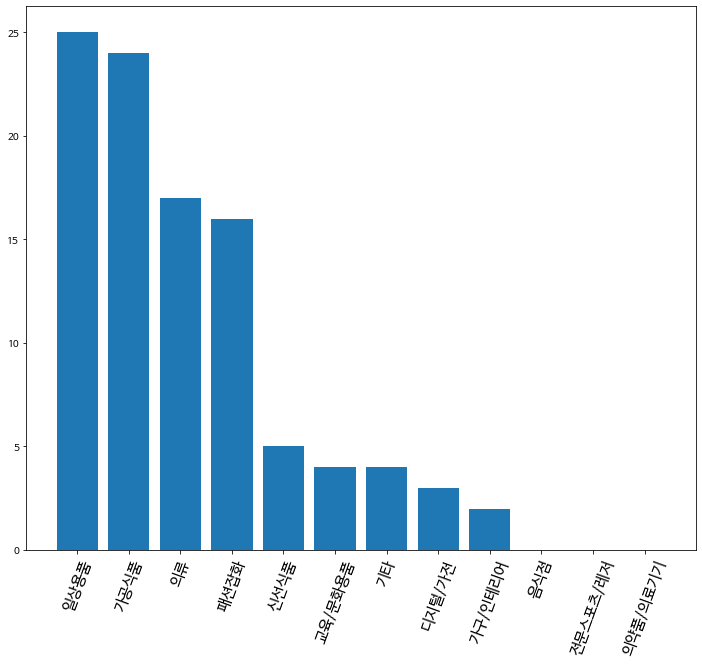

In [12]:
plt.figure(figsize=(12,10))
plt.xticks(fontsize=15, rotation=70) 
plt.bar(tf1.index, tf1['구매금액'])

<ipython-input-20-604d2afed50f>:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(tf1, labels=tf1.index, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops,explode=explode)


([<matplotlib.patches.Wedge at 0x7fc2fcb19160>,
 [Text(-0.9010672487178913, -0.6309340799861505, '일상용품'),
  Text(-0.6589259732111806, 0.8808044969388489, '가공식품'),
  Text(0.6619965007919476, 0.8784990796461981, '의류'),
  Text(1.0931447152094993, -0.12261578858182408, '패션잡화'),
  Text(0.7886017010848209, -0.7668815795454518, '신선식품'),
  Text(0.5433360944350967, -0.9564443990551755, '교육/문화용품'),
  Text(0.3146270707482891, -1.1580197780488688, '기타'),
  Text(0.05897195417801129, -1.2986617375669567, '디지털/가전'),
  Text(-0.15605642562990482, -1.3912750957375821, '가구/인테리어'),
  Text(-0.26047218005881123, -1.477211644760293, '음식점'),
  Text(-0.277836992062732, -1.575692421077646, '전문스포츠/레저'),
  Text(-0.29520180406665275, -1.6741731973949987, '의약품/의료기기')],
 [Text(-0.49149122657339517, -0.3441458618106275, '25.0%'),
  Text(-0.3594141672060985, 0.48043881651209935, '24.0%'),
  Text(0.3610890004319714, 0.4791813161706534, '17.0%'),
  Text(0.5962607537506359, -0.06688133922644948, '16.0%'),
  Text(0.430146

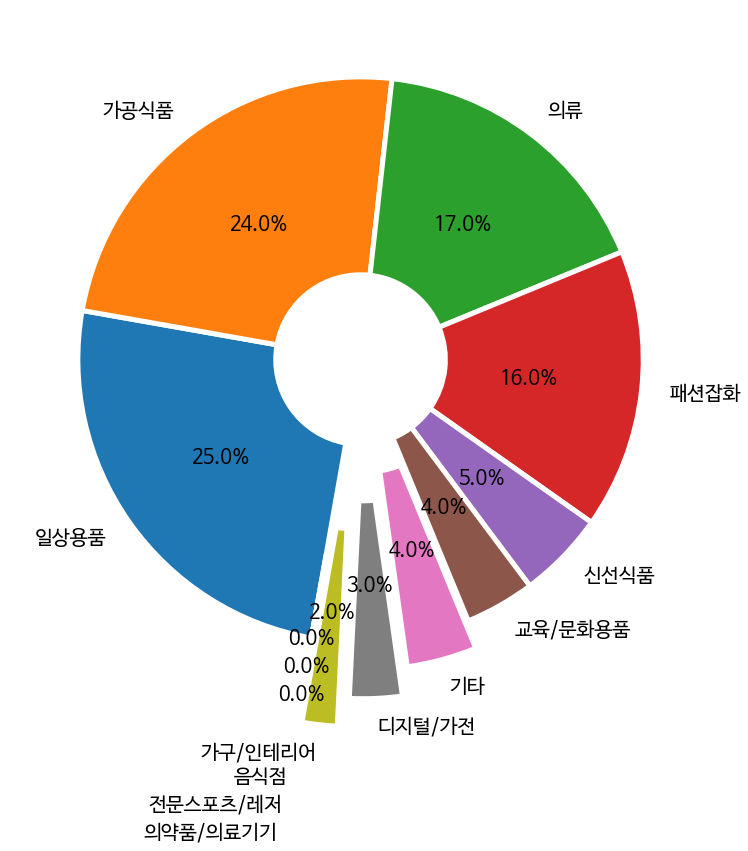

In [20]:
import matplotlib.pyplot as plt
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
explode = [0,0,0,0,0,0,0.1,0.2,0.3,0.4,0.5,0.6]
plt.rc('font', size=20)  

plt.figure(figsize=(13,13))
plt.pie(tf1, labels=tf1.index, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops,explode=explode)

In [24]:
tf = total.groupby(['대분류','년도'])[['구매금액']].sum()
tf

구매금액
대분류      년도               
가공식품     2014  81176171673
         2015  79126154106
가구/인테리어  2014   4600802380
         2015   5602079080
교육/문화용품  2014  13803829985
         2015  13502748080
기타       2014  12407323753
         2015  14875567762
디지털/가전   2014  10805208261
         2015  10653049220
신선식품     2014  15296627741
         2015  18727699209
음식점      2014    988353441
         2015   1027808151
의류       2014  55727257441
         2015  61835885339
의약품/의료기기 2014    305590380
         2015    127686640
일상용품     2014  82610096657
         2015  86837677087
전문스포츠/레저 2014    560292260
         2015    177543312
패션잡화     2014  51320286609
         2015  54923418374

In [29]:
tf.reset_index(inplace=True)

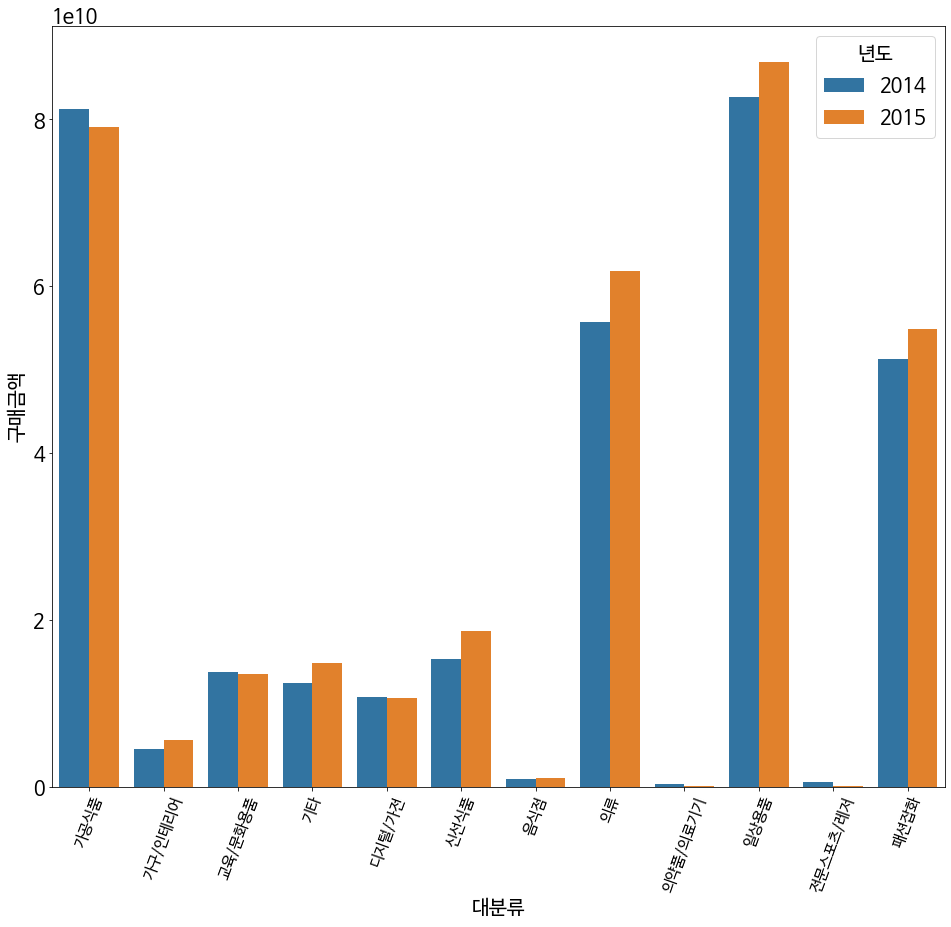

In [31]:
import seaborn as sns
plt.figure(figsize=(16,14))
plt.xticks(fontsize=15, rotation=70) 
sns.barplot(data = tf, x = '대분류', y='구매금액', hue='년도')

In [38]:
total1 = total.query("분기 in [1,2,3,4]")
tf1 = total1.groupby(['대분류','분기'])[['구매금액']].sum()
tf1

구매금액
대분류      분기             
가공식품     1   20156263121
         2   20108906191
         3   21264398302
         4   19646604059
가구/인테리어  1    1050246450
         2     954913760
         3    1006085810
         4    1589556360
교육/문화용품  1    3435808815
         2    3529745033
         3    3144685642
         4    3693590495
기타       1    2516565208
         2    2890261704
         3    2826141336
         4    4174355505
디지털/가전   1    2493673397
         2    2749803192
         3    2172232555
         4    3389499117
신선식품     1    3669466095
         2    3559406139
         3    3788940359
         4    4278815148
음식점      1     231789135
         2     223025879
         3     250720005
         4     282818422
의류       1   13305111565
         2   13252643582
         3   11247452804
         4   17922049490
의약품/의료기기 1      87445380
         2      96331820
         3      92037580
         4      29775600
일상용품     1   18511944307
         2   21167273914
         3   19039619438
         4   23891258998
전문스포츠/레저 1     159396180
         2     174350960
         3     173945160
         4      52599960
패션잡화     1   12077053090
         2   11839305223
         3    9943455666
         4   17460472630

In [39]:
total2 = total.query("분기 in [5,6,7,8]")
tf2 = total2.groupby(['대분류','분기'])[['구매금액']].sum()
tf2

구매금액
대분류      분기             
가공식품     5   20680707051
         6   18210509745
         7   21116780322
         8   19118156988
가구/인테리어  5    1343009790
         6    1360308710
         7    1288890340
         8    1609870240
교육/문화용품  5    3456855855
         6    3397279859
         7    2874925914
         8    3773686452
기타       5    3202445252
         6    3807833240
         7    3354984678
         8    4510304592
디지털/가전   5    2601675417
         6    2629043611
         7    2115902682
         8    3306427510
신선식품     5    4709049205
         6    4803835786
         7    4889232886
         8    4325581332
음식점      5     291332213
         6     256978272
         7     249402930
         8     230094736
의류       5   14964208989
         6   14952145880
         7   12808299710
         8   19111230760
의약품/의료기기 5      29035660
         6      36860180
         7      33825320
         8      27965480
일상용품     5   20176129323
         6   22093404111
         7   19780725248
         8   24787418405
전문스포츠/레저 5      39628520
         6      48250692
         7      44698550
         8      44965550
패션잡화     5   12960398680
         6   13238224104
         7   10978882420
         8   17745913170

In [40]:
tf1.reset_index(inplace=True)
tf2.reset_index(inplace=True)

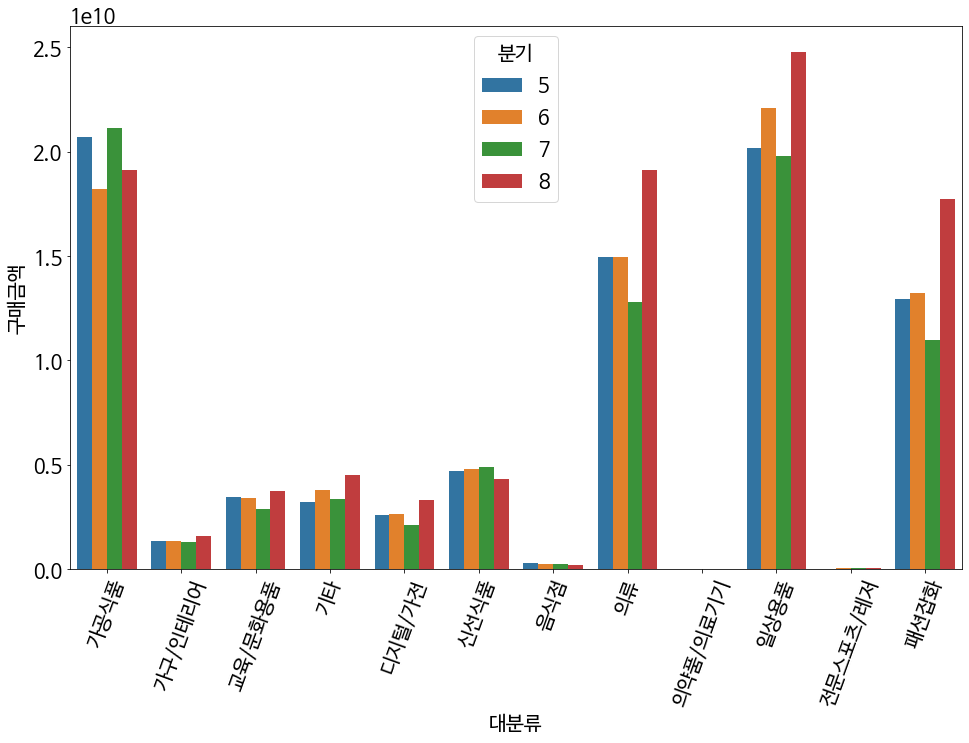

In [65]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=20, rotation=70) 
sns.barplot(data=tf2,x='대분류',y='구매금액',hue='분기')

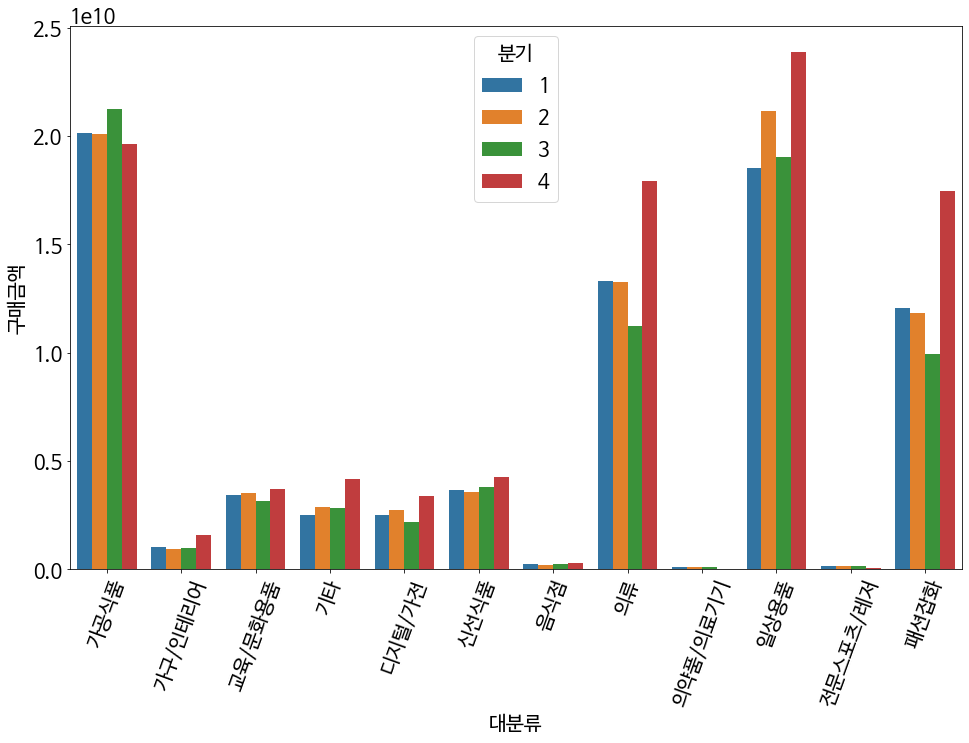

In [64]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=20, rotation=70) 
sns.barplot(data=tf1,x='대분류',y='구매금액',hue='분기')


In [67]:
tf3 = total.groupby(['분류','분기'])[['영수증번호']].nunique()
tf3 

영수증번호
분류 분기        
고가 1   237873
   2   258737
   3   254319
   4   281090
   5   269692
   6   283812
   7   275621
   8   277927
저가 1   739498
   2   846725
   3   870875
   4   861233
   5   841688
   6   923957
   7   932708
   8   842135
중가 1   619507
   2   680823
   3   674813
   4   713596
   5   692191
   6   733381
   7   708243
   8   681885

In [71]:
tf3.reset_index(inplace=True)

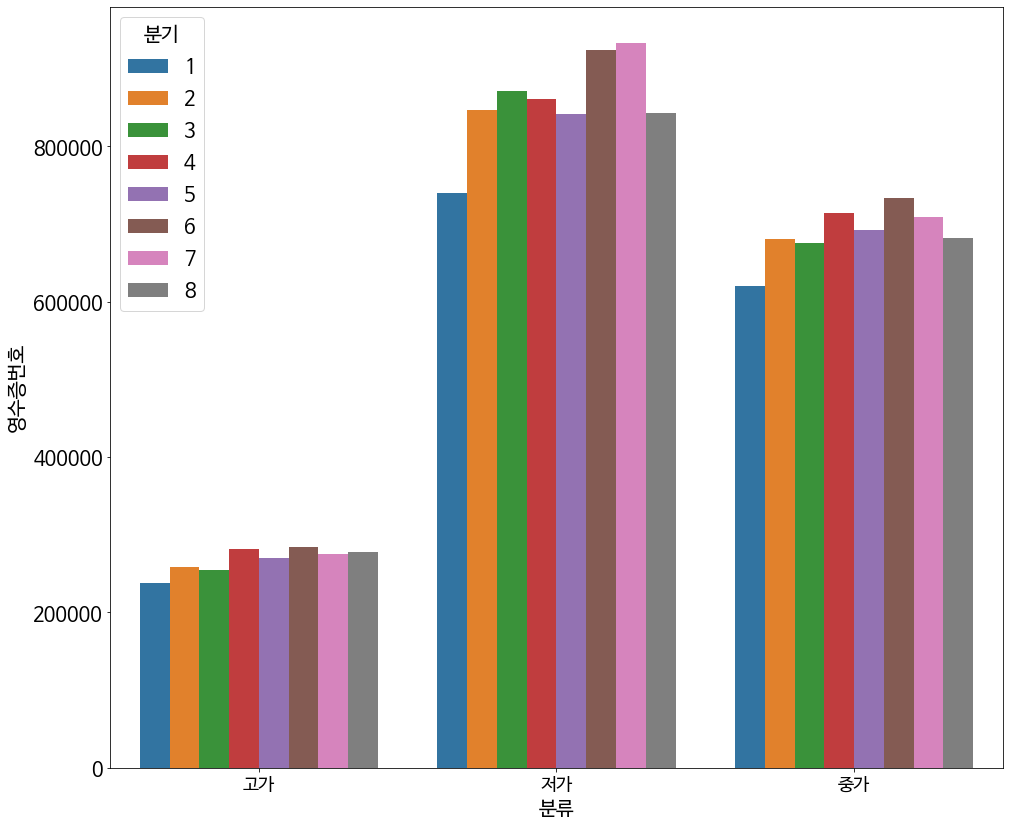

In [74]:
import seaborn as sns
plt.figure(figsize=(16,14))
plt.xticks(fontsize=18) 
sns.barplot(data = tf3, x = '분류', y='영수증번호', hue='분기')

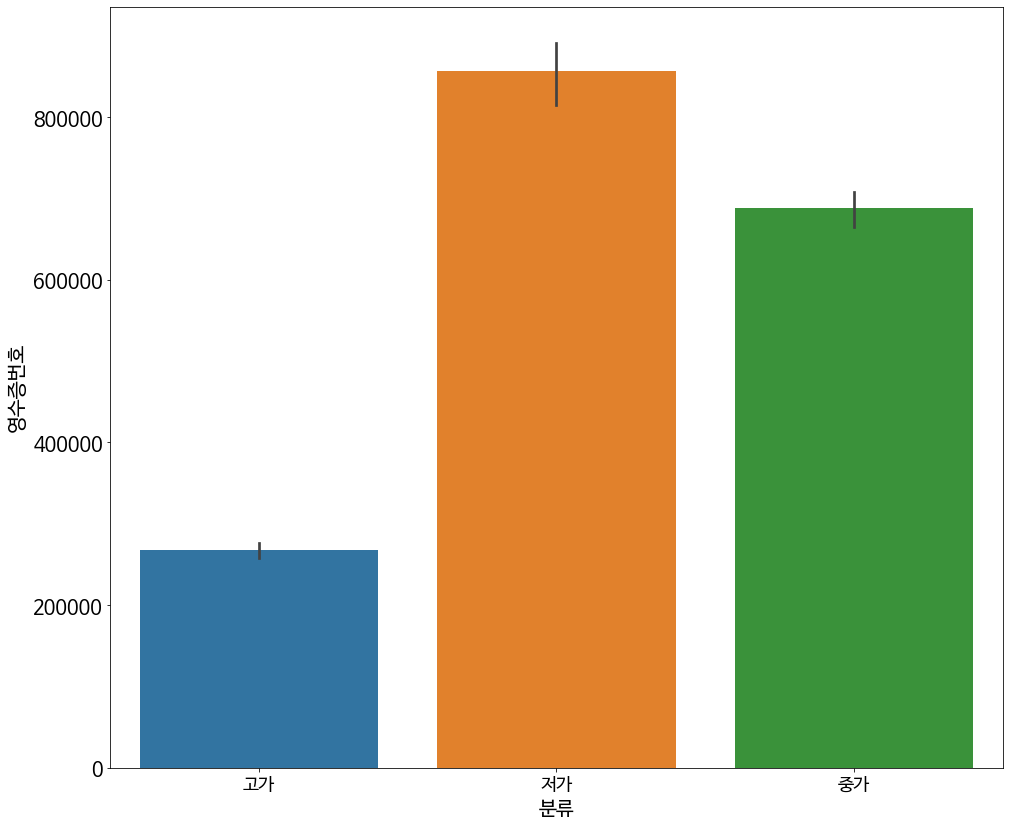

In [75]:
import seaborn as sns
plt.figure(figsize=(16,14))
plt.xticks(fontsize=18) 
sns.barplot(data = tf3, x = '분류', y='영수증번호')

In [87]:
tf4 = total.groupby(['거주지역'])[['구매금액']].sum().sort_values('구매금액', ascending=False).head(10)

In [88]:
tf4

,구매금액
거주지역,
1.0,235279527672
2.0,191014804616
12.0,83773351469
13.0,37430577277
3.0,27195330673
16.0,21195485061
14.0,16725915336
10.0,11245203476
9.0,10869531323


In [89]:
tf4.reset_index(inplace=True)

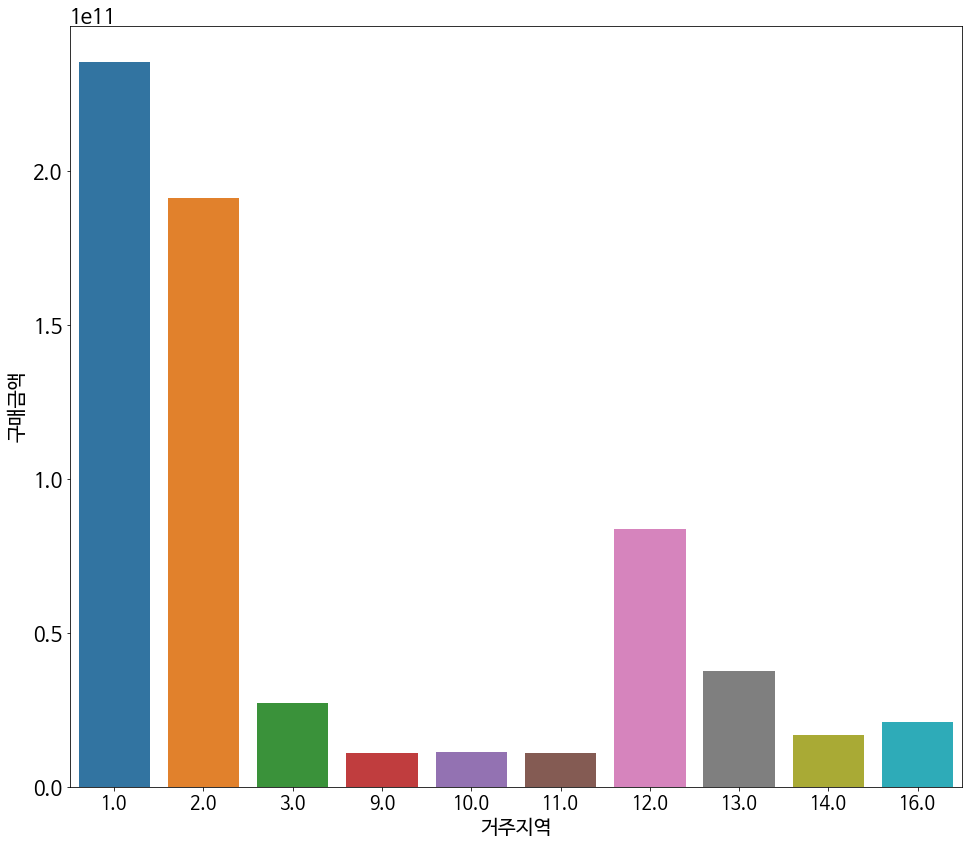

In [90]:
import seaborn as sns
plt.figure(figsize=(16,14))
plt.xticks(fontsize=18) 
sns.barplot(data = tf4, x = '거주지역', y='구매금액')